<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

Building upon the forward feature selection technique, we apply it to the diabetes dataset. By iterating over the entire dataset, we identify the subset of features that yield the best adjusted R-squared score. Furthermore, we visualise the results by plotting the R-squared and adjusted R-squared values, providing insights into the model's performance with different feature combinations.

In [35]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [39]:
## Load the Diabetes Housing dataset

# Load the diabetes datase

diabetes = datasets.load_diabetes()


In [11]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [41]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [15]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [17]:
# Target
y = diabetes.target

In [27]:
y.shape

(442,)

In [31]:
X.shape

(442, 10)

In [43]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [46]:
## Flag intermediate output
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [58]:
## Use Forward Feature Selection to pick a good model
selected_features = []
r2_list = []
adjusted_r2_list = []
n_feature = X.shape[1]
n_samples = X.shape[0]

for i in range(n_features):
    best_r2 = 0
    best_feature = None
    
    for feature in range(n_features):
        if feature not in selected_features:
            # Create a copy of selected features
            features_subset = selected_features + [feature]
            
            # Split data into training and testing sets
            X_subset = df.iloc[:, features_subset].values
            X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)
            
            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # Predict on test set
            y_pred = model.predict(X_test)
            
            
            r2 = r2_score(y_test, y_pred)
            adj_r2 = adjusted_r2(r2, n_samples, len(features_subset))
            
            # Check if this is the best R^2 so far
            if adj_r2 > best_r2:
                best_r2 = adj_r2
                best_feature = feature
    
    # Add the best feature to the selected features list
    selected_features.append(best_feature)
    r2_list.append(best_r2)
    adjusted_r2_list.append(adj_r2)
    
    # Display intermediate steps if show_steps is True
    if show_steps:
        print(f"Step {i+1}: Selected features: {df.columns[selected_features].tolist()}, Adjusted R^2: {adj_r2:.4f}")

# Display the final selected features and results
print("\nForward Feature Selection Results:")
print(f"Selected features: {df.columns[selected_features].tolist()}")
print(f"Adjusted R^2 values: {adjusted_r2_list}")



            


Forward Feature Selection Results:
Selected features: ['s5', 'bp', 'bmi', 's4', 'sex', 's6', 'age', 's3', 's1', 's2']
Adjusted R^2 values: [0.14599111492233352, 0.238315830633405, 0.30797504856416924, 0.3282579950375515, 0.3287219268059254, 0.33512990981601276, 0.32303288538257324, 0.31773915017175147, 0.3094228256457634, 0.3167397884779183]


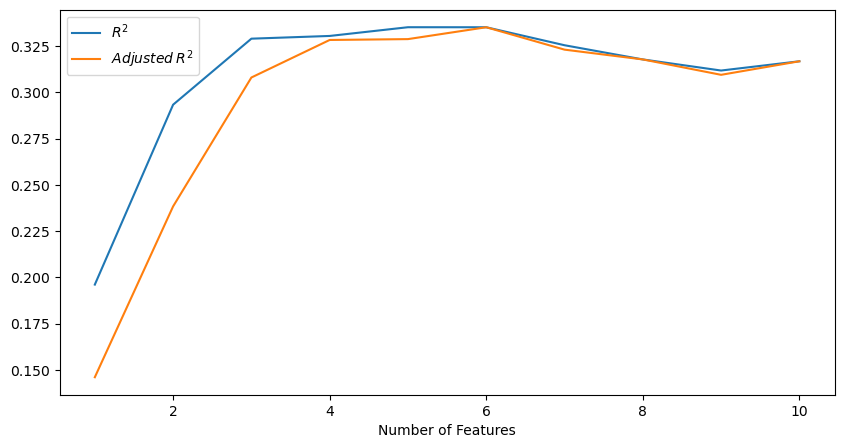

In [60]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



